In [1]:
import pandas as pd
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')

In [2]:
X_train.columns

Index(['Id', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_date', 'trans_time'],
      dtype='object')

In [3]:
# are all customers in the test set represented in the train set?
train_ccs = set(X_train['cc_num'])
all(cc in train_ccs for cc in X_test['cc_num'])
# yes!

True

In [4]:
# how many records in the train set for each person?
counts = X_train.groupby('cc_num').agg({'Id': 'count'})['Id']
# sorted(counts)
# btwn 5 and 1863...

In [5]:
# let's look at just the frauds
X_train_frauds = X_train[X_train['is_fraud']==True]

In [6]:
X_train_frauds

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
343,153337,3.744980e+14,"fraud_Mosciski, Gislason and Mertz",grocery_pos,320.49,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,...,1190,"Designer, ceramics/pottery",30/06/1948,a0ac1d7474fee1fc23a97f46da92cc8d,1376434525,47.346181,-101.490610,1.0,2020-09-01,08:22:00
507,56317,6.011400e+15,"fraud_Schneider, Hayes and Nikolaus",food_dining,149.42,Maria,Roy,F,58665 Nicholas Ford Suite 348,Sheffield,...,2121,Radio producer,14/10/1973,1cb66d986e7baf73cfae5bfc079fdd31,1373497799,43.098401,-74.096572,1.0,2020-09-01,08:22:00
1122,467970,4.607070e+15,fraud_Dare-Marvin,entertainment,552.04,Brenda,Perez,F,033 Tara Brook Suite 523,Coyle,...,1493,Amenity horticulturist,21/03/1985,b47bf6fc5222e4976b5dbbb85d896c5a,1386891556,35.420831,-98.207166,1.0,2020-09-01,08:22:00
1633,186741,3.501370e+15,fraud_Heathcote LLC,shopping_net,981.48,Danielle,Allen,F,87198 Macias Drive Suite 389,Loving,...,1925,Educational psychologist,26/05/1952,f4fc12554f5500f1b3e38e60203193a4,1377437346,32.127812,-104.698392,1.0,2020-09-01,08:22:00
3031,368573,4.103160e+12,fraud_Rempel Inc,shopping_net,1084.29,Christopher,Adkins,M,3512 Knight Center,Lorenzo,...,1571,Petroleum engineer,27/06/1982,b372d5ab8219afcf76e2a9f3d15e85aa,1384125632,33.139140,-101.925095,1.0,2020-09-01,08:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484756,282314,3.051090e+13,fraud_Koelpin and Sons,misc_net,832.54,Frederick,Robinson,M,1125 Ray Track,Livonia,...,96942,Horticultural consultant,01/04/1965,d23898ff3501c9146437e47c3104b488,1380927499,43.111532,-83.625562,1.0,2020-09-01,08:22:00
484940,374050,3.048760e+13,fraud_Rowe-Vandervort,grocery_net,12.55,Stephanie,Crane,F,144 Martinez Curve,Central,...,350,Counsellor,05/01/1955,ae2596de1d971bb90b0c2e8ea276f46e,1384407270,37.385250,-86.506171,1.0,2020-09-01,08:22:00
485502,266280,3.729650e+14,fraud_Bednar Group,misc_net,933.69,Debbie,Robbins,F,53199 Laurie Mills Apt. 864,Kirtland,...,6910,TEFL teacher,02/02/1956,935749ba6db1aeb592945e2e64dae531,1380322160,36.680654,-108.804646,1.0,2020-09-01,08:22:00
485725,375355,3.048760e+13,fraud_Murray-Smitham,grocery_pos,349.38,Stephanie,Crane,F,144 Martinez Curve,Central,...,350,Counsellor,05/01/1955,f81f12fc900d7dc7c1f55182ab9db343,1384466852,37.903138,-86.582598,1.0,2020-09-01,08:22:00


In [7]:
set(X_train['category'])

{'entertainment',
 'food_dining',
 'gas_transport',
 'grocery_net',
 'grocery_pos',
 'health_fitness',
 'home',
 'kids_pets',
 'misc_net',
 'misc_pos',
 'personal_care',
 'shopping_net',
 'shopping_pos',
 'travel'}

In [8]:
# sus categories?
frauds_by_catergory = X_train_frauds.groupby(['category']).agg({'trans_num': 'count'})
frauds_by_catergory['trans_num'] /= len(X_train_frauds)
print(frauds_by_catergory)
trans_count_by_catergory = X_train.groupby(['category']).agg({'trans_num': 'count'})
trans_count_by_catergory['trans_num'] /= len(X_train)
print(trans_count_by_catergory)
# seems grocery_pos, misc_net, shopping_net, shopping_pos are pretty sus

                trans_num
category                 
entertainment    0.025573
food_dining      0.023442
gas_transport    0.071391
grocery_net      0.020245
grocery_pos      0.225360
health_fitness   0.023974
home             0.030900
kids_pets        0.028769
misc_net         0.128396
misc_pos         0.035695
personal_care    0.031433
shopping_net     0.237080
shopping_pos     0.097496
travel           0.020245
                trans_num
category                 
entertainment    0.072477
food_dining      0.070515
gas_transport    0.101346
grocery_net      0.035066
grocery_pos      0.094514
health_fitness   0.065743
home             0.094132
kids_pets        0.087530
misc_net         0.049347
misc_pos         0.062196
personal_care    0.070897
shopping_net     0.075206
shopping_pos     0.089618
travel           0.031414


In [9]:
# I think these columns aren't helpful,
# either because they probably don't matter at all, or they do matter a little, but it'd be the same for each user
# also trans_date and trans_time seem to be teh same for eveything. we need to extract the actual date/time from the unix timestamp
useless_columns = ['merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_date', 'trans_time']

In [10]:
X_train_filtered = X_train.drop(columns=useless_columns)
X_train_filtered

,Id,cc_num,category,amt,gender,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,205743,5.596350e+15,gas_transport,72.18,M,5223f3d810e0083482e47a5c3a1eba94,1378023768,30.424083,-90.080958,0.0
1,465349,4.311370e+18,gas_transport,36.66,M,25f3a9b8613a9745c5802031bd3a2c62,1386834132,39.871664,-103.457961,0.0
2,17312,2.264940e+15,travel,1.74,M,2a6f3f7c697bc721a80078aefd68d857,1372338223,28.456118,-98.491336,0.0
3,234968,2.224100e+15,grocery_pos,140.99,F,fcd03eb50b00fe682d8a47f3bec089a6,1379131971,31.292136,-82.002506,0.0
4,194255,3.527540e+15,shopping_net,1722.19,F,d3105e269285b69b334e99433d6a6585,1377711655,33.067620,-80.201090,0.0
...,...,...,...,...,...,...,...,...,...,...
486249,502355,4.292900e+18,kids_pets,4.30,M,7e6011097067231cf9178de050f4dd4c,1387546102,46.332036,-114.660338,0.0
486250,527890,2.131570e+14,gas_transport,34.85,M,5f5926277386db598df3be7a7d5d491d,1388022446,33.229608,-118.386434,0.0
486251,253663,6.763730e+11,travel,9.22,F,04b32f0a628784474a8f48f977605c4d,1379807336,39.316927,-97.617048,0.0
486252,33882,3.026700e+13,food_dining,9.39,F,cfe6c288ba518822c1b6822515a165e1,1372807037,37.084437,-78.715023,0.0


In [11]:
# split category into sus and not sus
X_train_filtered['category'] = X_train_filtered['category'].map(lambda x: 1 if x in ['grocery_pos', 'misc_net', 'shopping_net'] else 0)
# convert unix time to datetime
X_train_filtered['datetime'] = pd.to_datetime(X_train_filtered['unix_time'],unit='s')

In [12]:
X_train_frauds = X_train_filtered[X_train_filtered['is_fraud'] == 1.0]
X_train_frauds

,Id,cc_num,category,amt,gender,trans_num,unix_time,merch_lat,merch_long,is_fraud,datetime
343,153337,3.744980e+14,1,320.49,F,a0ac1d7474fee1fc23a97f46da92cc8d,1376434525,47.346181,-101.490610,1.0,2013-08-13 22:55:25
507,56317,6.011400e+15,0,149.42,F,1cb66d986e7baf73cfae5bfc079fdd31,1373497799,43.098401,-74.096572,1.0,2013-07-10 23:09:59
1122,467970,4.607070e+15,0,552.04,F,b47bf6fc5222e4976b5dbbb85d896c5a,1386891556,35.420831,-98.207166,1.0,2013-12-12 23:39:16
1633,186741,3.501370e+15,1,981.48,F,f4fc12554f5500f1b3e38e60203193a4,1377437346,32.127812,-104.698392,1.0,2013-08-25 13:29:06
3031,368573,4.103160e+12,1,1084.29,M,b372d5ab8219afcf76e2a9f3d15e85aa,1384125632,33.139140,-101.925095,1.0,2013-11-10 23:20:32
...,...,...,...,...,...,...,...,...,...,...,...
484756,282314,3.051090e+13,1,832.54,M,d23898ff3501c9146437e47c3104b488,1380927499,43.111532,-83.625562,1.0,2013-10-04 22:58:19
484940,374050,3.048760e+13,0,12.55,F,ae2596de1d971bb90b0c2e8ea276f46e,1384407270,37.385250,-86.506171,1.0,2013-11-14 05:34:30
485502,266280,3.729650e+14,1,933.69,F,935749ba6db1aeb592945e2e64dae531,1380322160,36.680654,-108.804646,1.0,2013-09-27 22:49:20
485725,375355,3.048760e+13,1,349.38,F,f81f12fc900d7dc7c1f55182ab9db343,1384466852,37.903138,-86.582598,1.0,2013-11-14 22:07:32


In [13]:
import numpy as np
# actually, choose a user with at least some frauds
# perhaps some people are more predisposed to frauds than others...
rand_cc_num = np.random.choice(X_train_frauds['cc_num'])

In [14]:
rand_person_subset = X_train_filtered[X_train_filtered['cc_num'] == rand_cc_num]
rand_person_subset[rand_person_subset['is_fraud'] == 1.0]

,Id,cc_num,category,amt,gender,trans_num,unix_time,merch_lat,merch_long,is_fraud,datetime
27101,309792,3.004240e+13,1,769.89,M,60a6dea5bc2bcc4a0dc16e0c42973dbb,1381967883,41.331453,-72.448539,1.0,2013-10-16 23:58:03
192053,307993,3.004240e+13,1,282.39,M,f04121b6d75bff970c86fafd9f3903d1,1381888984,40.633124,-73.968881,1.0,2013-10-16 02:03:04
221163,306337,3.004240e+13,1,939.34,M,b0716712dc36b41dfcfe8c6747667ebd,1381804357,40.832568,-72.635088,1.0,2013-10-15 02:32:37
244654,307992,3.004240e+13,1,319.10,M,7814e756c3fc0af4eb76918fd6acd763,1381888944,41.346861,-73.811637,1.0,2013-10-16 02:02:24
290291,309296,3.004240e+13,1,1094.32,M,623a5980fa8e0a166dcbff372e9a40d8,1381948525,41.174890,-72.956586,1.0,2013-10-16 18:35:25
376339,309666,3.004240e+13,0,6.84,M,0fc2c4bf7b4517d511099ff886814945,1381962863,41.431904,-73.763269,1.0,2013-10-16 22:34:23


In [15]:
rand_person_subset

,Id,cc_num,category,amt,gender,trans_num,unix_time,merch_lat,merch_long,is_fraud,datetime
2067,509075,3.004240e+13,0,29.65,M,1257163106c978fe4f54bfec5bfcc140,1387641911,40.363830,-73.935422,0.0,2013-12-21 16:05:11
9550,79703,3.004240e+13,0,50.60,M,dc8ddbf66681a52c6a5b4639a46996a2,1374228189,41.566758,-73.211322,0.0,2013-07-19 10:03:09
17975,451730,3.004240e+13,0,134.85,M,cdcb7f3942b81f15849bfc0cecdbd72f,1386519378,41.608859,-73.765301,0.0,2013-12-08 16:16:18
25802,224989,3.004240e+13,1,42.64,M,d1ce60ab8f3ade0d94fa459b95c91553,1378713798,39.956515,-73.266062,0.0,2013-09-09 08:03:18
27101,309792,3.004240e+13,1,769.89,M,60a6dea5bc2bcc4a0dc16e0c42973dbb,1381967883,41.331453,-72.448539,1.0,2013-10-16 23:58:03
...,...,...,...,...,...,...,...,...,...,...,...
478011,184413,3.004240e+13,0,2.28,M,69185860122c7fe6544819bdf92f1e88,1377378621,41.502273,-72.491838,0.0,2013-08-24 21:10:21
478661,58851,3.004240e+13,0,53.84,M,bab6fbc782a39d53fcf3a61be14227bd,1373589252,40.491924,-73.768167,0.0,2013-07-12 00:34:12
480061,58263,3.004240e+13,0,9.83,M,b8f280fd1b8a6544c937d7a8af9b7101,1373570474,41.034103,-73.574453,0.0,2013-07-11 19:21:14
483440,255465,3.004240e+13,0,8.15,M,e176d87cdc7c91734720f07f6d19b672,1379864216,40.751501,-73.760535,0.0,2013-09-22 15:36:56


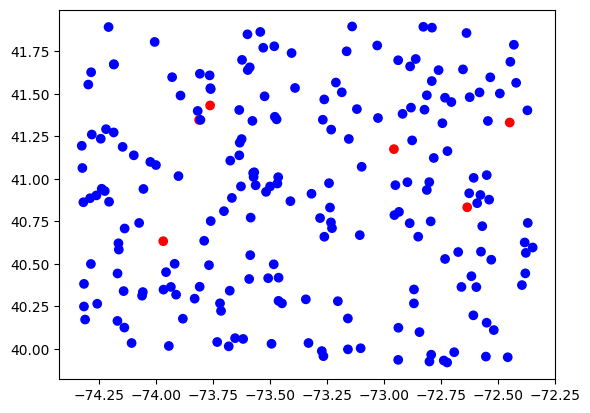

In [16]:
import matplotlib.pyplot as plt
plt.scatter(rand_person_subset['merch_long'], rand_person_subset['merch_lat'], color=['b' if x==0.0 else 'r' for x in rand_person_subset['is_fraud']])

In [17]:
rand_person_subset[rand_person_subset['amt']>300]

,Id,cc_num,category,amt,gender,trans_num,unix_time,merch_lat,merch_long,is_fraud,datetime
27101,309792,3.004240e+13,1,769.89,M,60a6dea5bc2bcc4a0dc16e0c42973dbb,1381967883,41.331453,-72.448539,1.0,2013-10-16 23:58:03
180859,319573,3.004240e+13,0,1805.34,M,10ae7f3e5f85caa309c0b97dec2bc65f,1382289248,41.597402,-72.533830,0.0,2013-10-20 17:14:08
221163,306337,3.004240e+13,1,939.34,M,b0716712dc36b41dfcfe8c6747667ebd,1381804357,40.832568,-72.635088,1.0,2013-10-15 02:32:37
244654,307992,3.004240e+13,1,319.10,M,7814e756c3fc0af4eb76918fd6acd763,1381888944,41.346861,-73.811637,1.0,2013-10-16 02:02:24
251490,526839,3.004240e+13,0,305.87,M,4de717b95072333383cddb759efd0124,1387999411,40.500082,-73.918808,0.0,2013-12-25 19:23:31
290291,309296,3.004240e+13,1,1094.32,M,623a5980fa8e0a166dcbff372e9a40d8,1381948525,41.174890,-72.956586,1.0,2013-10-16 18:35:25
292029,518980,3.004240e+13,1,1081.65,M,310ea037325cef3f145cd3936a3a2cdd,1387798415,40.498869,-74.286423,0.0,2013-12-23 11:33:35


In [18]:
X_train[X_train['cc_num'] == rand_cc_num]

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
2067,509075,3.004240e+13,fraud_Fadel-Hilpert,health_fitness,29.65,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,Northport,...,21902,Tour manager,16/05/1976,1257163106c978fe4f54bfec5bfcc140,1387641911,40.363830,-73.935422,0.0,2020-09-01,08:22:00
9550,79703,3.004240e+13,fraud_Erdman-Kertzmann,gas_transport,50.60,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,Northport,...,21902,Tour manager,16/05/1976,dc8ddbf66681a52c6a5b4639a46996a2,1374228189,41.566758,-73.211322,0.0,2020-09-01,08:22:00
17975,451730,3.004240e+13,fraud_Abshire PLC,entertainment,134.85,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,Northport,...,21902,Tour manager,16/05/1976,cdcb7f3942b81f15849bfc0cecdbd72f,1386519378,41.608859,-73.765301,0.0,2020-09-01,08:22:00
25802,224989,3.004240e+13,fraud_Rau and Sons,grocery_pos,42.64,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,Northport,...,21902,Tour manager,16/05/1976,d1ce60ab8f3ade0d94fa459b95c91553,1378713798,39.956515,-73.266062,0.0,2020-09-01,08:22:00
27101,309792,3.004240e+13,fraud_Ruecker Group,misc_net,769.89,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,Northport,...,21902,Tour manager,16/05/1976,60a6dea5bc2bcc4a0dc16e0c42973dbb,1381967883,41.331453,-72.448539,1.0,2020-09-01,08:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478011,184413,3.004240e+13,fraud_Zboncak Ltd,food_dining,2.28,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,Northport,...,21902,Tour manager,16/05/1976,69185860122c7fe6544819bdf92f1e88,1377378621,41.502273,-72.491838,0.0,2020-09-01,08:22:00
478661,58851,3.004240e+13,"fraud_Schaefer, McGlynn and Bosco",gas_transport,53.84,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,Northport,...,21902,Tour manager,16/05/1976,bab6fbc782a39d53fcf3a61be14227bd,1373589252,40.491924,-73.768167,0.0,2020-09-01,08:22:00
480061,58263,3.004240e+13,"fraud_Okuneva, Schneider and Rau",shopping_pos,9.83,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,Northport,...,21902,Tour manager,16/05/1976,b8f280fd1b8a6544c937d7a8af9b7101,1373570474,41.034103,-73.574453,0.0,2020-09-01,08:22:00
483440,255465,3.004240e+13,"fraud_Bahringer, Bergnaum and Quitzon",home,8.15,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,Northport,...,21902,Tour manager,16/05/1976,e176d87cdc7c91734720f07f6d19b672,1379864216,40.751501,-73.760535,0.0,2020-09-01,08:22:00


In [19]:
frauds_by_catergory = rand_person_subset[rand_person_subset['is_fraud']==1.0].groupby(['category']).agg({'trans_num': 'count'})
frauds_by_catergory['trans_num'] /= len(rand_person_subset[rand_person_subset['is_fraud']==1.0])
print(frauds_by_catergory)
trans_count_by_catergory = rand_person_subset.groupby(['category']).agg({'trans_num': 'count'})
trans_count_by_catergory['trans_num'] /= len(rand_person_subset)
print(trans_count_by_catergory)

          trans_num
category           
0          0.166667
1          0.833333
          trans_num
category           
0          0.716981
1          0.283019


In [20]:
m, s = rand_person_subset['amt'].mean(), rand_person_subset['amt'].std()

In [21]:
rand_person_subset[rand_person_subset['is_fraud'] == 1.0]['amt']

27101      769.89
192053     282.39
221163     939.34
244654     319.10
290291    1094.32
376339       6.84
Name: amt, dtype: float64

In [22]:
rand_person_subset['amt']

2067       29.65
9550       50.60
17975     134.85
25802      42.64
27101     769.89
           ...  
478011      2.28
478661     53.84
480061      9.83
483440      8.15
484628     30.09
Name: amt, Length: 212, dtype: float64

In [23]:
# maybe use if the amt is above 1 stddev of the mean?
# yes, but for a given merchant as well
rand_person_subset[rand_person_subset['amt'] > m+s]

,Id,cc_num,category,amt,gender,trans_num,unix_time,merch_lat,merch_long,is_fraud,datetime
27101,309792,3.004240e+13,1,769.89,M,60a6dea5bc2bcc4a0dc16e0c42973dbb,1381967883,41.331453,-72.448539,1.0,2013-10-16 23:58:03
70485,390718,3.004240e+13,0,264.97,M,71df5f771c976f615b26338b92f17b4c,1385053992,41.005791,-72.606713,0.0,2013-11-21 17:13:12
180859,319573,3.004240e+13,0,1805.34,M,10ae7f3e5f85caa309c0b97dec2bc65f,1382289248,41.597402,-72.533830,0.0,2013-10-20 17:14:08
192053,307993,3.004240e+13,1,282.39,M,f04121b6d75bff970c86fafd9f3903d1,1381888984,40.633124,-73.968881,1.0,2013-10-16 02:03:04
221163,306337,3.004240e+13,1,939.34,M,b0716712dc36b41dfcfe8c6747667ebd,1381804357,40.832568,-72.635088,1.0,2013-10-15 02:32:37
244654,307992,3.004240e+13,1,319.10,M,7814e756c3fc0af4eb76918fd6acd763,1381888944,41.346861,-73.811637,1.0,2013-10-16 02:02:24
251490,526839,3.004240e+13,0,305.87,M,4de717b95072333383cddb759efd0124,1387999411,40.500082,-73.918808,0.0,2013-12-25 19:23:31
290291,309296,3.004240e+13,1,1094.32,M,623a5980fa8e0a166dcbff372e9a40d8,1381948525,41.174890,-72.956586,1.0,2013-10-16 18:35:25
292029,518980,3.004240e+13,1,1081.65,M,310ea037325cef3f145cd3936a3a2cdd,1387798415,40.498869,-74.286423,0.0,2013-12-23 11:33:35
338646,511436,3.004240e+13,0,261.11,M,c315b9db06277fa5eb474f8dded0f7d6,1387667458,41.233996,-73.624936,0.0,2013-12-21 23:10:58


In [24]:
rand_merchants = set(X_train[X_train['cc_num'] == rand_cc_num]['merchant'])

In [25]:
safe_merchants = set(X_train[(X_train['cc_num'] == rand_cc_num) & (X_train['is_fraud'] == 0)]['merchant'])
safe_merchants

{'fraud_Abshire PLC',
 'fraud_Adams, Kovacek and Kuhlman',
 'fraud_Altenwerth-Kilback',
 'fraud_Ankunding-Carroll',
 'fraud_Auer-Mosciski',
 'fraud_Bahringer, Bergnaum and Quitzon',
 'fraud_Bailey-Morar',
 'fraud_Barrows PLC',
 'fraud_Barton Inc',
 'fraud_Barton LLC',
 'fraud_Bashirian Group',
 'fraud_Bauch-Blanda',
 'fraud_Bauch-Raynor',
 'fraud_Bechtelar-Rippin',
 'fraud_Becker, Harris and Harvey',
 'fraud_Beer-Jast',
 'fraud_Berge, Kautzer and Harris',
 'fraud_Bernhard, Grant and Langworth',
 'fraud_Bernier, Streich and Jewess',
 'fraud_Bins, Balistreri and Beatty',
 'fraud_Block-Parisian',
 'fraud_Bode-Schuster',
 'fraud_Boehm, Predovic and Reinger',
 'fraud_Bogisich-Homenick',
 'fraud_Botsford Ltd',
 'fraud_Boyer-Reichert',
 'fraud_Bradtke, Torp and Bahringer',
 'fraud_Christiansen-Gusikowski',
 'fraud_Conroy-Cruickshank',
 'fraud_Corwin-Gorczany',
 'fraud_Dach-Nader',
 "fraud_Deckow-O'Conner",
 'fraud_Denesik and Sons',
 'fraud_Denesik, Powlowski and Pouros',
 'fraud_Dibbert-Gree

In [26]:
fraud_merchants = set(X_train[(X_train['cc_num'] == rand_cc_num) & (X_train['is_fraud'] == 1)]['merchant'])
fraud_merchants

{'fraud_Auer-Mosciski',
 'fraud_Bednar Group',
 'fraud_Fisher Inc',
 'fraud_Herman Inc',
 'fraud_McDermott-Weimann',
 'fraud_Ruecker Group'}

In [27]:
fraud_merchants - safe_merchants

{'fraud_Bednar Group',
 'fraud_Fisher Inc',
 'fraud_Herman Inc',
 'fraud_McDermott-Weimann',
 'fraud_Ruecker Group'}

In [28]:
merchants = X_train[X_train['cc_num'] == rand_cc_num].groupby('merchant').agg({'trans_num': 'count'})

In [29]:
merchants[merchants.index.map(lambda x: x in fraud_merchants)]

,trans_num
merchant,
fraud_Auer-Mosciski,2
fraud_Bednar Group,1
fraud_Fisher Inc,1
fraud_Herman Inc,1
fraud_McDermott-Weimann,1
fraud_Ruecker Group,1


In [30]:
X_train[(X_train['cc_num'] == rand_cc_num) & (X_train['merchant'] == 'fraud_Moen, Reinger and Murphy')]

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time


In [31]:
# let's see if the test set's pairs of (person, merchant) are completely covered...
train_pairs = set(zip(X_train['cc_num'], X_train['merchant']))
test_pairs = set(zip(X_test['cc_num'], X_test['merchant']))
print(len(test_pairs))
print(len(test_pairs - train_pairs))

64067
24181


In [32]:
# what about just the merchants?
train_pairs = set(X_train['merchant'])
test_pairs = set(X_test['merchant'])
print(len(test_pairs))
print(len(test_pairs - train_pairs))
# yes, complete coverage

693
0


In [33]:
len(X_train[X_train['is_fraud'] == 1])

1877

In [34]:
X_train[X_train['is_fraud'] == 1].groupby('merchant').agg({'trans_num': 'count'}).sort_values(by='trans_num', ascending=False)

,trans_num
merchant,
"fraud_Mosciski, Ziemann and Farrell",17
"fraud_Schultz, Simonis and Little",16
fraud_Lemke-Gutmann,15
fraud_Heathcote LLC,15
"fraud_Heathcote, Yost and Kertzmann",15
...,...
fraud_Lynch-Mohr,1
fraud_Klein Group,1
fraud_Roberts-Beahan,1


In [35]:
print(X_train[(X_train['merchant'] == 'fraud_Lemke-Gutmann') & (X_train['is_fraud'] == 0)]['amt'].mean(),
X_train[(X_train['merchant'] == 'fraud_Lemke-Gutmann') & (X_train['is_fraud'] == 0)]['amt'].std())

77.92911479944675 213.987498631774


In [36]:
print(X_train[(X_train['merchant'] == 'fraud_Lemke-Gutmann') & (X_train['is_fraud'] == 1)]['amt'].mean(),
X_train[(X_train['merchant'] == 'fraud_Lemke-Gutmann') & (X_train['is_fraud'] == 1)]['amt'].std())

982.3226666666667 94.91455499302418


In [37]:
X_train[(X_train['merchant'] == 'fraud_Lemke-Gutmann') & (X_train['is_fraud'] == 0)]

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
410,297883,4.102000e+18,fraud_Lemke-Gutmann,shopping_net,16.28,William,Fitzgerald,M,715 Courtney Pike Suite 932,Keller,...,95035,Probation officer,13/06/1987,38b5e3291bbfd38dd771841884b5cf0d,1381524147,33.142039,-96.704761,0.0,2020-09-01,08:22:00
683,46574,3.583090e+15,fraud_Lemke-Gutmann,shopping_net,974.45,Hannah,Knight,F,0900 Beverly Landing,Louisville,...,736284,"Education officer, museum",13/09/1961,4f76620ea5570e1d79a13c1748bea9c0,1373166635,38.080797,-85.252466,0.0,2020-09-01,08:22:00
1455,367000,3.013520e+13,fraud_Lemke-Gutmann,shopping_net,6.28,Amanda,Williams,F,02018 Gary Key Apt. 911,Independence,...,123373,"Engineer, production",27/11/1992,ccb31d299dd791f8f8d8f2c641f60258,1384090198,38.866870,-94.372538,0.0,2020-09-01,08:22:00
2893,272362,3.453890e+14,fraud_Lemke-Gutmann,shopping_net,8.47,Justin,Fowler,M,5569 Phillips Neck Apt. 003,Coffeeville,...,3451,Financial trader,19/05/1984,733cc44eccf62bb7a349b752b8f789da,1380491935,33.879298,-90.480012,0.0,2020-09-01,08:22:00
4442,205292,2.132000e+14,fraud_Lemke-Gutmann,shopping_net,7.36,Christopher,Miller,M,493 Fitzgerald Fields Suite 454,Varnell,...,74,Pensions consultant,14/05/1944,c8a49fffd175902b76cdafa7a72675b8,1378011059,34.077636,-84.464575,0.0,2020-09-01,08:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482450,449433,3.780060e+14,fraud_Lemke-Gutmann,shopping_net,82.10,Christopher,Matthews,M,433 John Heights Apt. 849,Etlan,...,395,Senior tax professional/tax inspector,07/01/1982,18f606962db4a059603bbe4589600b25,1386485647,37.866548,-78.513117,0.0,2020-09-01,08:22:00
482590,379072,3.538520e+15,fraud_Lemke-Gutmann,shopping_net,1.81,Cassandra,Nunez,F,9572 Austin Forge Suite 612,Clay Center,...,269,Insurance underwriter,15/09/1965,25ce8f0696f622bee0bc46bf209ad89f,1384590136,40.860296,-82.443982,0.0,2020-09-01,08:22:00
482634,255707,4.646850e+18,fraud_Lemke-Gutmann,shopping_net,192.35,Julia,Bell,F,576 House Crossroad,West Sayville,...,4056,Film/video editor,25/06/1990,e26dbad39c3ba104a87c6cf22682ab0f,1379870634,40.317960,-74.064848,0.0,2020-09-01,08:22:00
482954,495411,3.525590e+15,fraud_Lemke-Gutmann,shopping_net,9.42,Scott,Fuller,M,861 Karen Common,Haw River,...,6006,Paramedic,20/07/1984,9bc544908cea2563580349359e780bd7,1387397362,35.700448,-78.340896,0.0,2020-09-01,08:22:00


In [38]:
X_train[(X_train['merchant'] == 'fraud_Lemke-Gutmann') & (X_train['is_fraud'] == 1)]

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
16052,447769,4.412720e+15,fraud_Lemke-Gutmann,shopping_net,925.31,Richard,Marshall,M,295 Page Creek Suite 181,Greenbush,...,776,Psychiatrist,17/11/1949,762b452785b0280257027cb266413cfb,1386458167,38.262403,-75.073913,1.0,2020-09-01,08:22:00
81747,131235,4.727240e+15,fraud_Lemke-Gutmann,shopping_net,855.28,Mary,Lewis,F,118 Justin Extension,Bay Minette,...,19090,Science writer,30/05/1929,348e68dd4bf32d012aca5defceabd795,1375742315,31.563648,-87.106188,1.0,2020-09-01,08:22:00
102886,2026,6.564460e+15,fraud_Lemke-Gutmann,shopping_net,955.16,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,1306,Public relations officer,10/09/1958,1799ffe421a2a05dc87903e379140f55,1371859145,43.027879,-90.493768,1.0,2020-09-01,08:22:00
112191,492082,6.390460e+11,fraud_Lemke-Gutmann,shopping_net,838.93,Dylan,Bonilla,M,2497 John Motorway Suite 922,Leetsdale,...,1140,"Administrator, education",20/06/1986,2587654a81248dccf3cd3add48096ec2,1387320224,39.788872,-80.165622,1.0,2020-09-01,08:22:00
134461,309725,4.306590e+15,fraud_Lemke-Gutmann,shopping_net,912.32,Renee,Walls,F,86542 Jessica Fords Apt. 706,Veedersburg,...,4049,"Development worker, community",19/10/1959,b9ff9b35536cd11c1c3abfe2ec9d916b,1381965441,39.464867,-87.307566,1.0,2020-09-01,08:22:00
154419,22236,4.761400e+18,fraud_Lemke-Gutmann,shopping_net,969.70,Diana,Jacobs,F,69608 Perez Mountain Apt. 006,Viola,...,1679,Psychiatric nurse,02/05/1986,4afe8724ad1ed51bca2f0d08c9529e3b,1372468623,37.310617,-92.913015,1.0,2020-09-01,08:22:00
163709,343617,4.026220e+12,fraud_Lemke-Gutmann,shopping_net,910.30,Debbie,Payne,F,204 Ashley Neck Apt. 169,Preston,...,4720,Broadcast presenter,18/05/1977,2d666feb2c7b048d6bf42042bf9cf6d9,1383267291,40.867269,-72.246289,1.0,2020-09-01,08:22:00
190470,229460,3.766570e+14,fraud_Lemke-Gutmann,shopping_net,1144.18,Richard,Vance,M,169 Shelia Knoll Suite 753,Zavalla,...,2836,"Designer, jewellery",03/12/1985,0fdefcd675a4871a57994f4c1cb9e28e,1378930479,30.507772,-94.023310,1.0,2020-09-01,08:22:00
196301,124735,4.725670e+15,fraud_Lemke-Gutmann,shopping_net,969.07,Alex,White,M,874 Fred Knolls Apt. 609,Orient,...,743,Video editor,19/09/1968,445b805b43e360ed4f77ed19f46bb75d,1375557395,41.367760,-72.385105,1.0,2020-09-01,08:22:00
211615,71440,3.579200e+15,fraud_Lemke-Gutmann,shopping_net,932.64,Tyler,Small,M,047 Kevin Haven,Boyd,...,1690,IT trainer,24/12/1975,1663f15f0d49fa2df0ee7a2510214413,1373914720,45.727734,-90.696716,1.0,2020-09-01,08:22:00


In [39]:
X_train[X_train['cc_num'] == 3583090000000000.0]

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
683,46574,3.583090e+15,fraud_Lemke-Gutmann,shopping_net,974.45,Hannah,Knight,F,0900 Beverly Landing,Louisville,...,736284,"Education officer, museum",13/09/1961,4f76620ea5570e1d79a13c1748bea9c0,1373166635,38.080797,-85.252466,0.0,2020-09-01,08:22:00
2370,190473,3.583090e+15,fraud_Medhurst Inc,home,92.04,Hannah,Knight,F,0900 Beverly Landing,Louisville,...,736284,"Education officer, museum",13/09/1961,3162bfbcdf3056f5d18a49e901ba1d16,1377556268,38.402362,-86.472749,0.0,2020-09-01,08:22:00
13299,144561,3.583090e+15,fraud_Cormier LLC,health_fitness,15.80,Hannah,Knight,F,0900 Beverly Landing,Louisville,...,736284,"Education officer, museum",13/09/1961,fbb6316760aaeb6923dc292ff63f1b7f,1376160609,38.642183,-86.628328,0.0,2020-09-01,08:22:00
18159,87088,3.583090e+15,"fraud_Watsica, Haag and Considine",shopping_pos,2.05,Hannah,Knight,F,0900 Beverly Landing,Louisville,...,736284,"Education officer, museum",13/09/1961,136102f865501bdce9f50b128b408421,1374393368,37.768822,-85.735311,0.0,2020-09-01,08:22:00
20524,245938,3.583090e+15,"fraud_Greenfelder, Bartoletti and Davis",misc_net,129.74,Hannah,Knight,F,0900 Beverly Landing,Louisville,...,736284,"Education officer, museum",13/09/1961,e20de906b29c3c8f54d663e850a05244,1379550174,37.219562,-86.275623,0.0,2020-09-01,08:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467114,25106,3.583090e+15,"fraud_Crist, Jakubowski and Littel",home,33.74,Hannah,Knight,F,0900 Beverly Landing,Louisville,...,736284,"Education officer, museum",13/09/1961,362f22cb28c0a9a3b31c45a84abf84d3,1372532042,38.870795,-85.736922,0.0,2020-09-01,08:22:00
470273,294194,3.583090e+15,"fraud_Armstrong, Walter and Gottlieb",food_dining,51.80,Hannah,Knight,F,0900 Beverly Landing,Louisville,...,736284,"Education officer, museum",13/09/1961,257cd441ed4323a50766e97f3fae4a97,1381389053,38.051187,-86.289524,0.0,2020-09-01,08:22:00
470656,392356,3.583090e+15,fraud_Spinka Inc,grocery_net,90.12,Hannah,Knight,F,0900 Beverly Landing,Louisville,...,736284,"Education officer, museum",13/09/1961,b863100b28c29de93792a88516df41b8,1385120355,38.659928,-85.286448,0.0,2020-09-01,08:22:00
473405,263773,3.583090e+15,fraud_Beier LLC,entertainment,1.55,Hannah,Knight,F,0900 Beverly Landing,Louisville,...,736284,"Education officer, museum",13/09/1961,3df029f9edfd84cc5b373417a42972f2,1380243362,38.313906,-85.269285,0.0,2020-09-01,08:22:00


In [40]:
merchant_stats=X_train[X_train['is_fraud'] == 0].groupby('merchant').agg(mean_amt=('amt', np.mean), std_amt=('amt', np.std))

In [41]:
frauds = X_train[X_train['is_fraud'] == 1]

In [42]:
merchant_stats_dict = merchant_stats.to_dict()
c = 0
for _, row in frauds.iterrows():
    mn, stddev = merchant_stats_dict['mean_amt'][row['merchant']], merchant_stats_dict['std_amt'][row['merchant']]
    if mn+2*stddev < row['amt'] or mn-2*stddev > row['amt']:
        c+=1
c/1877

0.8295151838039425

In [43]:
safes = X_train[X_train['is_fraud'] == 0]
c = 0
for _, row in safes.iterrows():
    mn, stddev = merchant_stats_dict['mean_amt'][row['merchant']], merchant_stats_dict['std_amt'][row['merchant']]
    if mn+2*stddev < row['amt'] or mn-2*stddev > row['amt']:
        c+=1
c/len(safes)

0.04182692406947481

In [44]:
set_wide_mean, set_wide_stddev = X_train['amt'].mean(), X_train['amt'].std()
amt_outliers = X_train[(X_train['amt']>set_wide_mean+2*set_wide_stddev) | (X_train['amt']<set_wide_mean-2*set_wide_stddev)]
len(amt_outliers[amt_outliers['is_fraud']==1])

937

In [45]:
person_stats =X_train[X_train['is_fraud'] == 0].groupby('cc_num').agg(mean_amt=('amt', np.mean), std_amt=('amt', np.std)).to_dict()

In [46]:
c = 0
for _, row in frauds.iterrows():
    if row['cc_num'] not in person_stats['mean_amt']:
        c+=1
    else:
        mn, stddev = person_stats['mean_amt'][row['cc_num']], person_stats['std_amt'][row['cc_num']]
        if mn+2*stddev < row['amt'] or mn-2*stddev > row['amt']:
            c+=1
c/1877

0.660628662759723

In [47]:
c = 0
for _, row in safes.iterrows():
    if row['cc_num'] not in person_stats['mean_amt']:
        c+=1
    else:
        mn, stddev = person_stats['mean_amt'][row['cc_num']], person_stats['std_amt'][row['cc_num']]
        if mn+2*stddev < row['amt'] or mn-2*stddev > row['amt']:
            c+=1
c/1877

5.782631859350027

In [48]:
c/len(safes)

0.022408165540477767

In [49]:
X_train[X_train['cc_num'] == 2242180000000000.0]

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
5805,517274,2.242180e+15,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,14462,Database administrator,03/03/1959,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1.0,2020-09-01,08:22:00
14268,517571,2.242180e+15,fraud_Jaskolski-Vandervort,misc_net,766.38,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,14462,Database administrator,03/03/1959,44292cbc51e37dc018ee6a988a4bc426,1387754019,33.771462,-90.651342,1.0,2020-09-01,08:22:00
67737,514913,2.242180e+15,fraud_Predovic Inc,shopping_net,997.77,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,14462,Database administrator,03/03/1959,a9082963c08b7f2873cf04e5209e584f,1387722610,35.112482,-90.417066,1.0,2020-09-01,08:22:00
199694,517529,2.242180e+15,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,14462,Database administrator,03/03/1959,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1.0,2020-09-01,08:22:00
225028,517341,2.242180e+15,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,14462,Database administrator,03/03/1959,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1.0,2020-09-01,08:22:00
254829,511675,2.242180e+15,"fraud_Zboncak, Rowe and Murazik",shopping_net,981.22,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,14462,Database administrator,03/03/1959,337214fb7984f4a661314d40a31f0bea,1387670236,34.526886,-88.975344,1.0,2020-09-01,08:22:00
280446,517197,2.242180e+15,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,14462,Database administrator,03/03/1959,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1.0,2020-09-01,08:22:00
293564,511235,2.242180e+15,fraud_Kozey-Boehm,shopping_net,866.01,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,14462,Database administrator,03/03/1959,9a4d301d2430446a0a3917086133f051,1387665416,34.138515,-90.187114,1.0,2020-09-01,08:22:00
344595,512502,2.242180e+15,fraud_Mraz-Herzog,gas_transport,6.60,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,14462,Database administrator,03/03/1959,92364a31b4d19e614bf8b6ef31b2255a,1387684589,34.610104,-89.275890,1.0,2020-09-01,08:22:00


In [50]:
rand_cc_num = np.random.choice(X_train_frauds['cc_num'])
rand_person_subset = X_train_filtered[X_train_filtered['cc_num'] == rand_cc_num]

In [51]:
rand_person_subset[rand_person_subset['is_fraud'] == 1]

,Id,cc_num,category,amt,gender,trans_num,unix_time,merch_lat,merch_long,is_fraud,datetime
18023,330135,4.883410e+12,1,974.36,F,5cc92a8f0821a1fb075acce4e8b21ed4,1382742373,48.375593,-122.835090,1.0,2013-10-25 23:06:13
30807,330061,4.883410e+12,1,869.72,F,5c758235759b69cd3b7096f8d926e4e3,1382740886,48.027705,-121.919191,1.0,2013-10-25 22:41:26
34483,327375,4.883410e+12,1,322.47,F,9b4096f11b62cd5224508a17f19ff6c3,1382653233,48.429622,-123.129855,1.0,2013-10-24 22:20:33
217019,327427,4.883410e+12,1,980.71,F,a290fd872c03053e06a576a17e4c15fe,1382655633,46.827527,-123.007723,1.0,2013-10-24 23:00:33
278064,327431,4.883410e+12,0,924.60,F,2aca2695c7b92482706a1c005a8cd456,1382655814,47.688948,-122.785322,1.0,2013-10-24 23:03:34
284510,327627,4.883410e+12,1,307.89,F,0c701d416f5caf4406abfec8f7953c22,1382662526,47.146720,-122.930456,1.0,2013-10-25 00:55:26
333167,327423,4.883410e+12,1,832.55,F,b0f9476adc02a9b53a9aa528545e0910,1382655286,46.679249,-123.271805,1.0,2013-10-24 22:54:46
363947,327605,4.883410e+12,0,13.98,F,a6f9fe79b9d3d83a227704d7a541341d,1382661684,46.600376,-121.538207,1.0,2013-10-25 00:41:24


<AxesSubplot: >

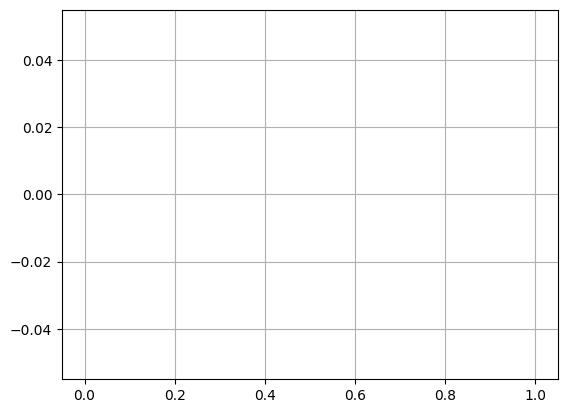

In [52]:
rand_person_subset[rand_person_subset['is_fraud'] == 0]['datetime'].map(lambda x: x.hour).hist(bins=24)

<AxesSubplot: >

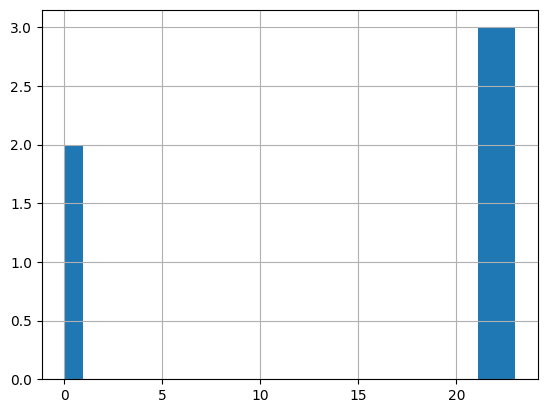

In [53]:
rand_person_subset[rand_person_subset['is_fraud'] == 1]['datetime'].map(lambda x: x.hour).hist(bins=24)

In [54]:
user_merchant_stats =X_train[X_train['is_fraud'] == 0].groupby(['cc_num', 'merchant']).agg(mean_amt=('amt', np.mean), std_amt=('amt', np.std)).to_dict()

In [55]:
c = 0
for _, row in frauds.iterrows():
    num, merc = row['cc_num'], row['merchant']
    if (num, merc) not in user_merchant_stats['mean_amt']:
        c+=1
    elif not np.isnan(user_merchant_stats['std_amt'][(num, merc)]):
        mn, stddev = user_merchant_stats['mean_amt'][(num, merc)], user_merchant_stats['std_amt'][(num, merc)]
        if mn+2*stddev < row['amt'] or mn-2*stddev > row['amt']:
            c+=1
c/1877

0.6963239211507725

In [58]:
frauds['hour'] = pd.to_datetime(frauds['unix_time'],unit='s').dt.hour

/var/folders/rz/znvx90ld6vnbmf6g3sf73y2w0000gn/T/ipykernel_3489/1689637287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frauds['hour'] = pd.to_datetime(frauds['unix_time'],unit='s').dt.hour


In [59]:
frauds

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,hour
343,153337,3.744980e+14,"fraud_Mosciski, Gislason and Mertz",grocery_pos,320.49,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,...,"Designer, ceramics/pottery",30/06/1948,a0ac1d7474fee1fc23a97f46da92cc8d,1376434525,47.346181,-101.490610,1.0,2020-09-01,08:22:00,22
507,56317,6.011400e+15,"fraud_Schneider, Hayes and Nikolaus",food_dining,149.42,Maria,Roy,F,58665 Nicholas Ford Suite 348,Sheffield,...,Radio producer,14/10/1973,1cb66d986e7baf73cfae5bfc079fdd31,1373497799,43.098401,-74.096572,1.0,2020-09-01,08:22:00,23
1122,467970,4.607070e+15,fraud_Dare-Marvin,entertainment,552.04,Brenda,Perez,F,033 Tara Brook Suite 523,Coyle,...,Amenity horticulturist,21/03/1985,b47bf6fc5222e4976b5dbbb85d896c5a,1386891556,35.420831,-98.207166,1.0,2020-09-01,08:22:00,23
1633,186741,3.501370e+15,fraud_Heathcote LLC,shopping_net,981.48,Danielle,Allen,F,87198 Macias Drive Suite 389,Loving,...,Educational psychologist,26/05/1952,f4fc12554f5500f1b3e38e60203193a4,1377437346,32.127812,-104.698392,1.0,2020-09-01,08:22:00,13
3031,368573,4.103160e+12,fraud_Rempel Inc,shopping_net,1084.29,Christopher,Adkins,M,3512 Knight Center,Lorenzo,...,Petroleum engineer,27/06/1982,b372d5ab8219afcf76e2a9f3d15e85aa,1384125632,33.139140,-101.925095,1.0,2020-09-01,08:22:00,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484756,282314,3.051090e+13,fraud_Koelpin and Sons,misc_net,832.54,Frederick,Robinson,M,1125 Ray Track,Livonia,...,Horticultural consultant,01/04/1965,d23898ff3501c9146437e47c3104b488,1380927499,43.111532,-83.625562,1.0,2020-09-01,08:22:00,22
484940,374050,3.048760e+13,fraud_Rowe-Vandervort,grocery_net,12.55,Stephanie,Crane,F,144 Martinez Curve,Central,...,Counsellor,05/01/1955,ae2596de1d971bb90b0c2e8ea276f46e,1384407270,37.385250,-86.506171,1.0,2020-09-01,08:22:00,5
485502,266280,3.729650e+14,fraud_Bednar Group,misc_net,933.69,Debbie,Robbins,F,53199 Laurie Mills Apt. 864,Kirtland,...,TEFL teacher,02/02/1956,935749ba6db1aeb592945e2e64dae531,1380322160,36.680654,-108.804646,1.0,2020-09-01,08:22:00,22
485725,375355,3.048760e+13,fraud_Murray-Smitham,grocery_pos,349.38,Stephanie,Crane,F,144 Martinez Curve,Central,...,Counsellor,05/01/1955,f81f12fc900d7dc7c1f55182ab9db343,1384466852,37.903138,-86.582598,1.0,2020-09-01,08:22:00,22


Counter({22: 473, 23: 470, 0: 171, 3: 164, 2: 154, 1: 142, 20: 30, 18: 27, 21: 23, 19: 22, 16: 20, 15: 19, 5: 17, 11: 16, 7: 15, 17: 15, 12: 15, 14: 14, 4: 14, 13: 12, 6: 12, 10: 12, 9: 11, 8: 9})


<AxesSubplot: >

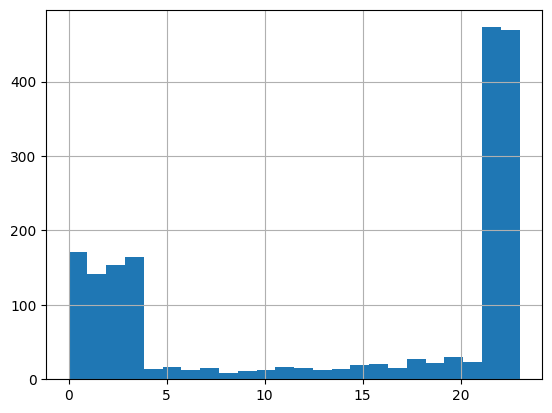

In [62]:
# looks like most frauds occur at night, btween 21 to 4
from collections import Counter
print(Counter(frauds['hour']))
frauds['hour'].hist(bins=24)

/var/folders/rz/znvx90ld6vnbmf6g3sf73y2w0000gn/T/ipykernel_3489/2900257219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  safes['hour'] = pd.to_datetime(safes['unix_time'],unit='s').dt.hour


<AxesSubplot: >

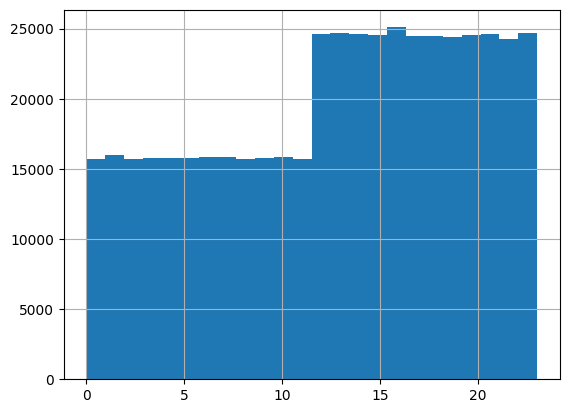

In [61]:
safes['hour'] = pd.to_datetime(safes['unix_time'],unit='s').dt.hour
safes['hour'].hist(bins=24)

<AxesSubplot: >

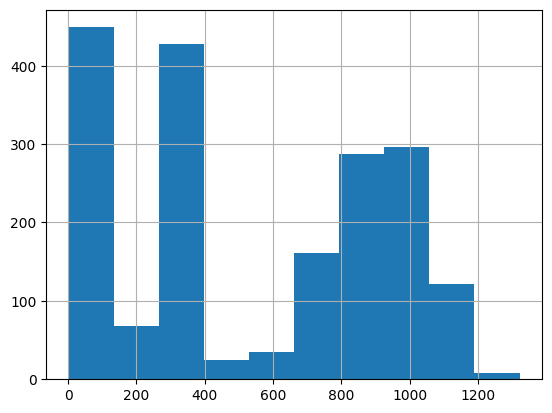

In [63]:
frauds['amt'].hist()

<AxesSubplot: >

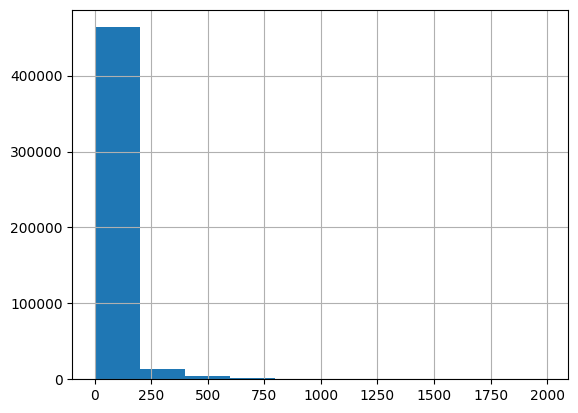

In [72]:
# m=safes['amt'].max()
safes[safes['amt']<2000]['amt'].hist()

In [99]:
X_train

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,date
0,205743,5.596350e+15,fraud_Berge LLC,gas_transport,72.18,Joseph,Moody,M,5901 Foster Pine,Kenner,...,"Engineer, petroleum",1941-04-23,5223f3d810e0083482e47a5c3a1eba94,1378023768,30.424083,-90.080958,0.0,2020-09-01,08:22:00,2013-09-01
1,465349,4.311370e+18,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,36.66,Phillip,Delacruz,M,26678 Lisa Locks Apt. 904,Iliff,...,Community arts worker,1969-09-21,25f3a9b8613a9745c5802031bd3a2c62,1386834132,39.871664,-103.457961,0.0,2020-09-01,08:22:00,2013-12-12
2,17312,2.264940e+15,fraud_Ankunding-Carroll,travel,1.74,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,...,Land,1995-10-17,2a6f3f7c697bc721a80078aefd68d857,1372338223,28.456118,-98.491336,0.0,2020-09-01,08:22:00,2013-06-27
3,234968,2.224100e+15,"fraud_Schumm, Bauch and Ondricka",grocery_pos,140.99,Sheri,Thomas,F,019 Kimberly Light Apt. 039,Kings Bay,...,Naval architect,1963-11-09,fcd03eb50b00fe682d8a47f3bec089a6,1379131971,31.292136,-82.002506,0.0,2020-09-01,08:22:00,2013-09-14
4,194255,3.527540e+15,fraud_Gerlach Inc,shopping_net,1722.19,Teresa,Stein,F,2838 White Fields Apt. 473,Brunson,...,Social researcher,1974-05-12,d3105e269285b69b334e99433d6a6585,1377711655,33.067620,-80.201090,0.0,2020-09-01,08:22:00,2013-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486249,502355,4.292900e+18,fraud_Wilkinson PLC,kids_pets,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,...,"Therapist, horticultural",1995-08-16,7e6011097067231cf9178de050f4dd4c,1387546102,46.332036,-114.660338,0.0,2020-09-01,08:22:00,2013-12-20
486250,527890,2.131570e+14,fraud_Kuvalis Ltd,gas_transport,34.85,Adam,Santos,M,725 Jo Trace Apt. 102,Glendale,...,Advertising account planner,1982-07-30,5f5926277386db598df3be7a7d5d491d,1388022446,33.229608,-118.386434,0.0,2020-09-01,08:22:00,2013-12-26
486251,253663,6.763730e+11,"fraud_Hodkiewicz, Prohaska and Paucek",travel,9.22,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,...,Tourism officer,1987-07-18,04b32f0a628784474a8f48f977605c4d,1379807336,39.316927,-97.617048,0.0,2020-09-01,08:22:00,2013-09-21
486252,33882,3.026700e+13,fraud_Kihn-Fritsch,food_dining,9.39,Sarah,Foster,F,77872 Andrea Glen Apt. 543,Ford,...,Chief Operating Officer,1976-11-21,cfe6c288ba518822c1b6822515a165e1,1372807037,37.084437,-78.715023,0.0,2020-09-01,08:22:00,2013-07-02


In [79]:
X_train['date'] = safes['hour'] = pd.to_datetime(safes['unix_time'],unit='s').dt.date

/var/folders/rz/znvx90ld6vnbmf6g3sf73y2w0000gn/T/ipykernel_3489/2358325602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['date'] = safes['hour'] = pd.to_datetime(safes['unix_time'],unit='s').dt.date


In [88]:
X_train['dob'] = pd.to_datetime(X_train['dob']).dt.date

In [100]:
(X_train['date']-X_train['dob']) / pd.Timedelta(days=365)

0         72.408219
1         44.254795
2         17.706849
3         49.882192
4         39.323288
            ...    
486249    18.358904
486250    31.430137
486251    26.197260
486252    36.635616
486253    48.704110
Length: 486254, dtype: float64

In [104]:
frauds = X_train[X_train['is_fraud'] == 1]

In [107]:
frauds['date'] = pd.to_datetime(frauds['unix_time'],unit='s').dt.date

/var/folders/rz/znvx90ld6vnbmf6g3sf73y2w0000gn/T/ipykernel_3489/2727815715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frauds['date'] = pd.to_datetime(frauds['unix_time'],unit='s').dt.date


<AxesSubplot: >

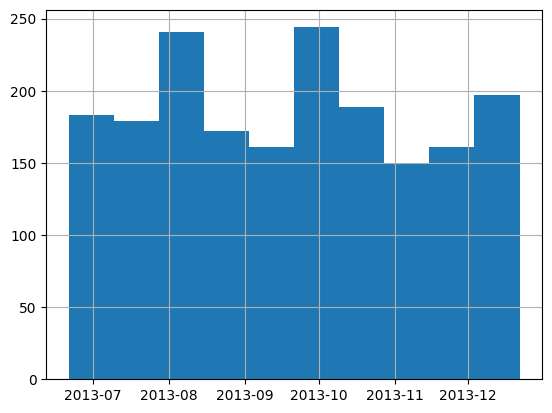

In [109]:
frauds['date'].hist()

<AxesSubplot: >

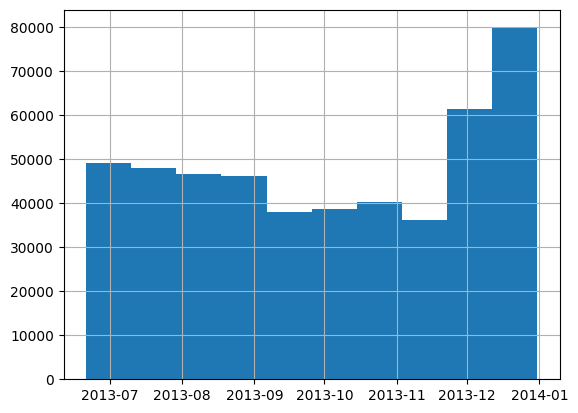

In [110]:
X_train['date'].hist()

In [234]:
rand_cc_num = np.random.choice(X_train['cc_num'])
rand_person_subset = X_train[X_train['cc_num'] == rand_cc_num]

In [235]:
lat, lon = rand_person_subset.iloc[0]['lat'], rand_person_subset.iloc[0]['long']

In [236]:
lat, lon

(41.1558, -101.136)

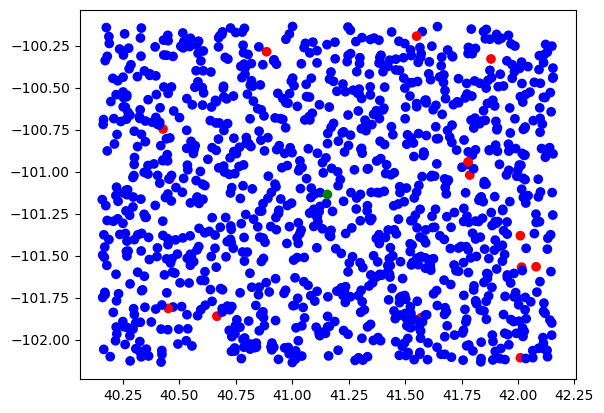

In [237]:
plt.scatter(list(rand_person_subset['merch_lat'])+[lat], list(rand_person_subset['merch_long'])+[lon], color=list(rand_person_subset['is_fraud'].map(lambda x: 'b' if x==0 else 'r'))+['g'])

In [238]:
rand_person_subset

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,date
1136,220631,3.764450e+14,"fraud_Ritchie, Bradtke and Stiedemann",travel,5.27,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,75513147743a685a7c7ef7b80fb3d59e,1378579773,40.240845,-100.701916,0.0,2020-09-01,08:22:00,2013-09-07
1597,418628,3.764450e+14,fraud_Ernser-Feest,home,8.73,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,6d2dad6bd96ce2bfa0bed52ea0cbd6e4,1385899616,41.496802,-102.020980,0.0,2020-09-01,08:22:00,2013-12-01
1955,426229,3.764450e+14,fraud_Heidenreich PLC,grocery_pos,69.02,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,0dbe5f8c068e8b32b3d3a5ad985257d9,1386057314,41.299795,-100.322348,0.0,2020-09-01,08:22:00,2013-12-03
2198,217410,3.764450e+14,fraud_Berge-Ullrich,home,50.38,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,72ade38b9a33430c0aeefc3645936929,1378488743,41.372725,-100.637066,0.0,2020-09-01,08:22:00,2013-09-06
2209,202954,3.764450e+14,"fraud_Schuppe, Nolan and Hoeger",shopping_pos,3.16,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,eef2a9b0f2b6f335b3fcefc81ae71c18,1377963936,41.442315,-101.694961,0.0,2020-09-01,08:22:00,2013-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484736,272257,3.764450e+14,fraud_Bauch-Blanda,entertainment,17.15,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,68a4d849714612dac67e3b3a9a3a5e16,1380489450,41.640212,-100.953997,0.0,2020-09-01,08:22:00,2013-09-29
484737,375330,3.764450e+14,fraud_Schoen-Quigley,kids_pets,1.57,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,01a1bac75cc7422a80f4a849c895effe,1384466247,41.601504,-102.019392,0.0,2020-09-01,08:22:00,2013-11-14
484742,535663,3.764450e+14,fraud_Terry Ltd,home,7.89,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,7bb55baa20122a1d7cf31c53bb723703,1388173795,40.781805,-101.998753,0.0,2020-09-01,08:22:00,2013-12-27
484983,150699,3.764450e+14,fraud_O'Keefe-Wisoky,food_dining,4.41,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,0c6c066862c105738b7eeb9a6d60c01b,1376327283,41.082830,-101.154101,0.0,2020-09-01,08:22:00,2013-08-12


In [242]:
from collections import Counter
freq = Counter(rand_person_subset[rand_person_subset['is_fraud'] == 0]['merchant'])

In [243]:
rand_person_subset[rand_person_subset['is_fraud']==1]['merchant'].map(freq)

12211     4
20603     2
53448     4
80095     0
103675    0
123672    0
162393    1
235504    0
312901    0
315173    1
344088    4
399370    0
459898    0
461567    1
Name: merchant, dtype: int64

In [244]:
freq

Counter({'fraud_Cummings LLC': 10,
         'fraud_Lind, Huel and McClure': 7,
         'fraud_Schimmel-Olson': 7,
         'fraud_Botsford Ltd': 6,
         'fraud_Abbott-Steuber': 6,
         'fraud_Osinski Inc': 6,
         'fraud_Koss, Hansen and Lueilwitz': 6,
         'fraud_Hudson-Ratke': 6,
         'fraud_Schaefer Ltd': 6,
         'fraud_Torp-Labadie': 6,
         'fraud_Fisher Inc': 5,
         'fraud_Balistreri-Nader': 5,
         'fraud_Schumm, Bauch and Ondricka': 5,
         'fraud_Mosciski, Gislason and Mertz': 5,
         'fraud_Bernhard Inc': 5,
         'fraud_Bartoletti-Wunsch': 5,
         'fraud_Kihn Inc': 5,
         'fraud_Cartwright-Harris': 5,
         "fraud_Greenholt, O'Hara and Balistreri": 5,
         'fraud_Connelly-Carter': 5,
         'fraud_Mohr Inc': 5,
         'fraud_Bauch-Blanda': 5,
         'fraud_Pouros-Conroy': 5,
         'fraud_Little Ltd': 5,
         'fraud_Huels-Nolan': 5,
         'fraud_Bahringer, Schoen and Corkery': 5,
         'fraud_

In [245]:
rand_person_subset[rand_person_subset['is_fraud']==1]

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,date
12211,135983,3.764450e+14,"fraud_Altenwerth, Cartwright and Koss",shopping_net,882.83,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,ed037bf9087620bade94230a48f44a84,1375927667,42.010574,-102.108069,1.0,2020-09-01,08:22:00,2013-08-08
20603,133485,3.764450e+14,fraud_Spencer-Runolfsson,misc_pos,714.17,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,4153c58ec1c1ed7567afe299b8477137,1375833812,40.886500,-100.286657,1.0,2020-09-01,08:22:00,2013-08-07
53448,135610,3.764450e+14,fraud_Hermann and Sons,shopping_pos,1043.40,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,80a1a271990ee56b0c6d5e31013962ee,1375914468,41.786423,-101.020784,1.0,2020-09-01,08:22:00,2013-08-07
80095,137994,3.764450e+14,"fraud_Hagenes, Hermann and Stroman",travel,10.62,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,844be598e478cbf1ec433e87b419fa8c,1376000981,40.666270,-101.860761,1.0,2020-09-01,08:22:00,2013-08-08
103675,135993,3.764450e+14,fraud_Kutch and Sons,grocery_pos,358.55,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,398c9d221d4fb18eaff5af1007044de0,1375927993,41.571712,-101.868459,1.0,2020-09-01,08:22:00,2013-08-08
123672,135761,3.764450e+14,fraud_Swift PLC,kids_pets,22.62,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,18af4df0c5afda3d524cff8bb6ef5f92,1375918635,40.457291,-101.045061,1.0,2020-09-01,08:22:00,2013-08-07
162393,138152,3.764450e+14,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,22.93,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,51e8bfa7fa6deacc3cc6eed911b20dfd,1376005316,42.016051,-101.568851,1.0,2020-09-01,08:22:00,2013-08-08
235504,135973,3.764450e+14,"fraud_Stanton, Jakubowski and Baumbach",shopping_net,1107.33,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,563f710e03fe0a2e06eebeb46307bbaf,1375927322,40.427648,-100.746378,1.0,2020-09-01,08:22:00,2013-08-08
312901,135742,3.764450e+14,"fraud_Lakin, Ferry and Beatty",food_dining,127.17,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,c9d60e46517a66d3fc31737736dd4e2f,1375918007,41.550923,-100.194191,1.0,2020-09-01,08:22:00,2013-08-07
315173,135773,3.764450e+14,fraud_Friesen Ltd,health_fitness,20.84,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,Insurance broker,1982-11-02,78f5e7b210280752236ec2347977c917,1375919001,40.450803,-101.814364,1.0,2020-09-01,08:22:00,2013-08-07


In [255]:
category_stats = X_train[X_train['is_fraud']==0].groupby('category').agg(mean_amt=('amt', 'mean'), std_amt=('amt', 'std'), count=('cc_num', 'count'))

In [256]:
category_stats

,mean_amt,std_amt,count
category,,,
entertainment,63.449773,62.015277,35194
food_dining,50.639933,48.232496,34244
gas_transport,63.684826,15.609781,49146
grocery_net,53.787953,22.904932,17013
grocery_pos,114.000627,48.041827,45535
health_fitness,53.893190,47.924609,31923
home,57.615117,47.428159,45714
kids_pets,57.435322,48.548225,42508
misc_net,71.936481,147.990630,23754


In [254]:
rand_person_subset[rand_person_subset['is_fraud']==1][['category', 'amt']]

,category,amt
12211,shopping_net,882.83
20603,misc_pos,714.17
53448,shopping_pos,1043.40
80095,travel,10.62
103675,grocery_pos,358.55
123672,kids_pets,22.62
162393,health_fitness,22.93
235504,shopping_net,1107.33
312901,food_dining,127.17
315173,health_fitness,20.84


<AxesSubplot: >

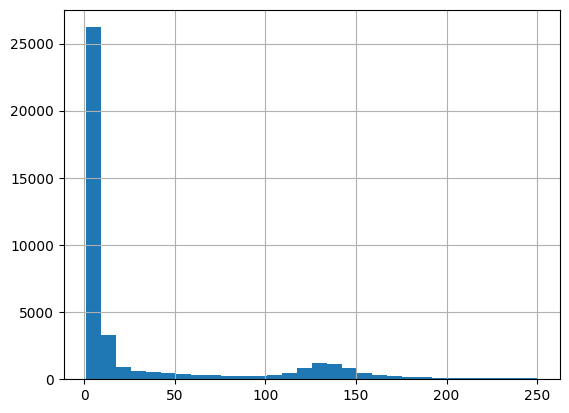

In [274]:
X_train[(X_train['category'] == 'shopping_pos') & (X_train['amt'] < 250)]['amt'].hist(bins=30)

<AxesSubplot: >

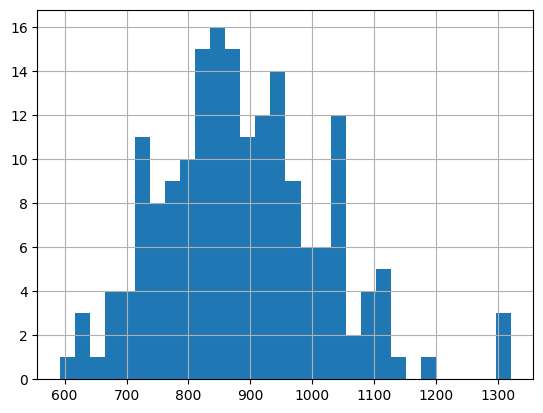

In [273]:
frauds[(frauds['category'] == 'shopping_pos') & (frauds['amt'] < 10000)]['amt'].hist(bins=30)

In [285]:
frauds_by_catergory = frauds.groupby(['category']).agg({'trans_num': 'count'})
frauds_by_catergory['trans_num'] /= len(frauds)
{x:y for x,y in list(zip(frauds_by_catergory.sort_values(by='trans_num', ascending=False).index, range(len(frauds_by_catergory))))}

{'shopping_net': 0,
 'grocery_pos': 1,
 'misc_net': 2,
 'shopping_pos': 3,
 'gas_transport': 4,
 'misc_pos': 5,
 'personal_care': 6,
 'home': 7,
 'kids_pets': 8,
 'entertainment': 9,
 'health_fitness': 10,
 'food_dining': 11,
 'grocery_net': 12,
 'travel': 13}

In [294]:
frauds_city_stats = frauds.groupby(by='city').agg({'cc_num': 'count', 'city_pop': 'mean'})
frauds_city_stats['fraud_rate'] = frauds_city_stats['cc_num']/frauds_city_stats['city_pop']
frauds_city_stats.sort_values(by='fraud_rate', ascending=False)

,cc_num,city_pop,fraud_rate
city,,,
Barnard,7,6.300000e+01,0.111111
Doe Hill,11,9.900000e+01,0.111111
Allentown,12,1.120000e+02,0.107143
Camden,26,2.955385e+02,0.087975
Notrees,2,2.300000e+01,0.086957
...,...,...,...
Vancouver,3,2.994800e+05,0.000010
Seattle,8,8.377920e+05,0.000010
Dallas,11,1.263321e+06,0.000009


In [291]:
X_train.groupby(by='city').agg({'cc_num': 'count'}).sort_values(by='cc_num', ascending=False)

,cc_num
city,
Birmingham,2102
Meridian,1964
Phoenix,1961
Utica,1908
San Antonio,1901
...,...
Lexington,8
Seattle,8
Rice,8


In [317]:
frauds_city_stats = frauds.groupby(by='city').agg({'cc_num': 'count'})
city_stats = X_train.groupby(by='city').agg({'cc_num': 'count'})
fraud_rate_df = frauds_city_stats.merge(city_stats, how='outer', on='city', suffixes=('_fraud', '_all'))
fraud_rate_df['fraud_rate'] = fraud_rate_df['cc_num_fraud'].fillna(0)/fraud_rate_df['cc_num_all']
fraud_rate_df.sort_values(by='fraud_rate', ascending=False, inplace=True)
fraud_rate_df['ranking'] = range(len(fraud_rate_df))

In [318]:
fraud_rate_df.to_dict()

{'cc_num_fraud': {'Craig': 14.0,
  'Kirkwood': 10.0,
  'Grifton': 8.0,
  'Morrowville': 11.0,
  'Guthrie': 9.0,
  'Senatobia': 9.0,
  'Springville': 11.0,
  'Wever': 5.0,
  'Rice': 8.0,
  'Kirtland': 9.0,
  'Seligman': 8.0,
  'Seattle': 8.0,
  'Lexington': 8.0,
  'Preston': 13.0,
  'Elk Rapids': 13.0,
  'Jay': 14.0,
  'Whittemore': 13.0,
  'Chatham': 13.0,
  'Annapolis': 12.0,
  'Livonia': 11.0,
  'Sprague': 10.0,
  'Etlan': 12.0,
  'Mc Intosh': 10.0,
  'Lorenzo': 11.0,
  'Palmdale': 11.0,
  'Remer': 10.0,
  'Azusa': 10.0,
  'Adams': 9.0,
  'Owensville': 10.0,
  'Maria Stein': 9.0,
  'Williams': 9.0,
  'Loving': 10.0,
  'Richland': 9.0,
  'Pea Ridge': 10.0,
  'Greenbush': 8.0,
  'Akron': 8.0,
  'Linthicum Heights': 7.0,
  'Dell City': 9.0,
  'Jaffrey': 7.0,
  'Malad City': 8.0,
  'West Finley': 9.0,
  'Trenton': 7.0,
  'Burrton': 16.0,
  'Reynolds': 15.0,
  'New Franken': 8.0,
  'Desdemona': 7.0,
  'Moores Hill': 7.0,
  'Spirit Lake': 7.0,
  'West Eaton': 13.0,
  'Jackson': 7.0,
  'Pro

In [323]:
X_train.columns

Index(['Id', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_date', 'trans_time', 'date'],
      dtype='object')

In [324]:
frauds_state_stats = frauds.groupby(by='state').agg({'cc_num': 'count'})
state_stats = X_train.groupby(by='state').agg({'cc_num': 'count'})
fraud_rate_df = frauds_state_stats.merge(state_stats, how='outer', on='state', suffixes=('_fraud', '_all'))
fraud_rate_df['fraud_rate'] = fraud_rate_df['cc_num_fraud'].fillna(0)/fraud_rate_df['cc_num_all']
fraud_rate_df.sort_values(by='fraud_rate', ascending=False, inplace=True)

In [332]:
def frauds_by_feature(feature):
    frauds_feature_stats = X_train[X_train['is_fraud'] == 1].groupby(by=feature).agg({'cc_num': 'count'})
    feature_stats = X_train.groupby(by=feature).agg({'cc_num': 'count'})
    fraud_rate_df = frauds_feature_stats.merge(feature_stats, how='outer', on=feature, suffixes=('_fraud', '_all'))
    fraud_rate_df['fraud_rate'] = fraud_rate_df['cc_num_fraud'].fillna(0)/fraud_rate_df['cc_num_all']
    fraud_rate_df.sort_values(by='fraud_rate', ascending=False, inplace=True)
    return fraud_rate_df

In [339]:
X_train['month'] = pd.to_datetime(X_train['unix_time'],unit='s').dt.month
df = frauds_by_feature('zip')
df
# df[df['fraud_rate'] > 0]

,cc_num_fraud,cc_num_all,fraud_rate
zip,,,
73044,9.0,9,1.0
52658,5.0,5,1.0
28530,8.0,8,1.0
14141,11.0,11,1.0
13795,10.0,10,1.0
...,...,...,...
33760,NaN,178,0.0
33809,NaN,367,0.0
33811,NaN,551,0.0
